In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cust_Spend_Data_New.csv')

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17


In [4]:
df.shape

(829, 7)

In [5]:
df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [8]:
df1 = df.drop(['Cust_ID','Name'],axis=1)
df1.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
SC = StandardScaler()

In [11]:
scaled_data = SC.fit_transform(df1)

In [12]:
scaled_data

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [13]:
from sklearn.cluster import KMeans

In [17]:
KM = KMeans(n_clusters=2)

In [18]:
KM.fit(scaled_data)

KMeans(n_clusters=2)

In [19]:
KM.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [20]:
KM.inertia_

2225.8180780994685

In [22]:
KM = KMeans(n_clusters=3)
KM.fit(scaled_data)
KM.inertia_

1074.382380298951

In [23]:
KM = KMeans(n_clusters=4)
KM.fit(scaled_data)
KM.inertia_

909.4495242917942

In [24]:
KM = KMeans(n_clusters=5)
KM.fit(scaled_data)
KM.inertia_

784.5887748781101

In [26]:
a=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data)
    a.append(KM.inertia_)

C:\Users\dines\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [28]:
print(a)

[4145.0, 2225.8180780994685, 1074.382380298951, 909.4495242917942, 784.5887748781101, 697.8265440467183, 630.8436793236681, 584.9706301584716, 538.9924110956532, 529.1047540639631]


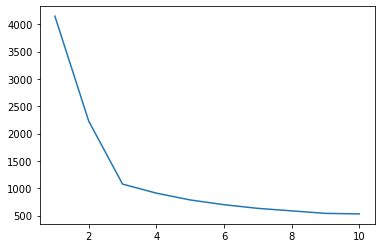

In [29]:
plt.plot(range(1,11),a)

In [30]:
KM = KMeans(n_clusters=3)
KM.fit(scaled_data)
labels = KM.labels_

In [31]:
df['clust_KMeans'] = labels
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,clust_KMeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


In [32]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [33]:
silhouette_score(scaled_data,labels)

0.5863370901372584

In [34]:
silhouette_samples(scaled_data,labels).min()

0.04131038567750352

In [35]:
sil_width = silhouette_samples(scaled_data,labels)

In [36]:
df['sil_width'] = sil_width
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,clust_KMeans,sil_width
0,1,Abraham,1123,28,1,16,14,1,0.656055
1,2,Adela,9818,13,5,2,5,2,0.512424
2,3,Adelina,9824,10,10,2,2,2,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,1,0.703167


In [37]:
df.to_csv('Cust_Spend_Data_New_KMeans.csv')